# 🎯 Modelos de Clasificación Supervisada en Economía Laboral

## 📋 Objetivo del Notebook
Este notebook aplica y compara 6 algoritmos de clasificación supervisada para predecir ingresos laborales usando datos reales. Es una aplicación práctica de los conceptos teóricos vistos en clase.

**Algoritmos a evaluar:**
- k-Nearest Neighbors (k-NN)
- Regresión Logística  
- Naive Bayes
- Árboles de Decisión
- Support Vector Machines (SVM)
- Random Forest

**Dataset:** Adult Census Income - predecir si una persona gana >$50K/año

## 🎓 ¿Por qué este dataset?
El Adult Census Dataset es un benchmark clásico en machine learning y especialmente relevante para economía laboral porque:

1. **Variables socioeconómicas reales:** Edad, educación, ocupación, estado civil
2. **Problema económico fundamental:** Determinantes de ingresos laborales
3. **Balance de complejidad:** Lo suficientemente complejo para ser interesante, pero no overwhelming
4. **Interpretabilidad:** Las variables tienen significado económico claro
5. **Comparabilidad:** Permite comparar resultados con literatura existente

## 🧠 ¿Qué aprenderemos?
- **Metodológicamente:** Cómo implementar y comparar algoritmos en datos reales
- **Estadísticamente:** Cómo evaluar performance y seleccionar modelos
- **Económicamente:** Qué variables predicen mejor los ingresos laborales
- **Prácticamente:** Cuándo usar cada algoritmo en contextos reales

# 🔧 Importación de Librerías

**¿Por qué necesitamos todas estas librerías?**

- **pandas/numpy:** Manipulación de datos y operaciones numéricas
- **matplotlib/seaborn:** Visualización de resultados (crucial para interpretación)
- **sklearn:** Implementaciones optimizadas de algoritmos de ML
- **warnings:** Suprimir warnings que distraen del análisis principal

**¿Qué esperamos?**
Una carga limpia sin errores. Si hay errores aquí, generalmente indican problemas de instalación.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix,
                           accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, roc_curve)

# Modelos de clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 📊 Exploración Inicial de Datos

**¿Por qué es crucial esta etapa?**

La exploración de datos es fundamental porque:

1. **Calidad de datos:** Identificar valores faltantes, outliers, inconsistencias
2. **Comprensión del problema:** Entender la distribución de la variable objetivo
3. **Selección de técnicas:** Diferentes características requieren diferentes enfoques
4. **Baseline expectations:** Establecer qué nivel de accuracy sería "bueno"

**¿Qué esperamos encontrar?**

- **Datos desbalanceados:** Típicamente ~75% gana ≤$50K, ~25% gana >$50K
- **Variables categóricas:** Occupation, education, etc. con múltiples niveles
- **Algunos valores faltantes:** Especialmente en workclass y occupation
- **Variables correlacionadas:** Education y education_num, por ejemplo

In [ ]:
# Cargar el dataset Adult desde UCI Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Nombres de las columnas
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                'marital_status', 'occupation', 'relationship', 'race', 'sex',
                'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

# Cargar datos
df = pd.read_csv(url, names=column_names, na_values=' ?', skipinitialspace=True)

print(f"📊 Dimensiones del dataset: {df.shape}")
print(f"🎯 Variable objetivo: {df['income'].value_counts()}")

# Información básica del dataset
print("\n" + "="*50)
print("📋 INFORMACIÓN BÁSICA DEL DATASET")
print("="*50)
df.info()

print("\n" + "="*50)
print("📊 ESTADÍSTICAS DESCRIPTIVAS")
print("="*50)
print(df.describe())

print("\n" + "="*50)
print("🔍 VALORES FALTANTES")
print("="*50)
print(df.isnull().sum())

print("\n" + "="*50)
print("📈 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO")
print("="*50)
print(df['income'].value_counts(normalize=True))

📊 Dimensiones del dataset: (32561, 15)
🎯 Variable objetivo: income
<=50K    24720
>50K      7841
Name: count, dtype: int64

📋 INFORMACIÓN BÁSICA DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non

## 🔍 Interpretación de la Exploración

**¿Qué nos dicen estos números?**

1. **Dimensiones (~32K filas):** Suficiente para entrenar modelos robustos
2. **Variables mixed:** Numéricas (age, hours_per_week) y categóricas (occupation, education)
3. **Desbalance moderado:** ~76% ≤ \$50K vs ~24% >\$50K (común en datos de ingresos)
4. **Valores faltantes:** no hay

**Implicaciones para nuestros modelos:**

- **k-NN:** Necesitará escalamiento por las diferentes escalas numéricas
- **Regresión Logística:** Requerirá encoding de categóricas y posible regularización
- **Naive Bayes:** Manejará bien el mix de variables
- **Árboles:** No requieren preprocesamiento especial
- **SVM:** Muy sensible a escalamiento
- **Random Forest:** Robusto a estas características

**Baseline ingenuo:** Siempre predecir "≤$50K" daría ~76% accuracy. ¡Nuestros modelos deben superar esto significativamente!

**¿Por qué el preprocesamiento es crítico?**

El famoso dicho "garbage in, garbage out" es especialmente cierto en ML. Un buen preprocesamiento puede ser la diferencia entre un modelo mediocre y uno excelente.

**Decisiones metodológicas que tomaremos:**

1. **Eliminar valores faltantes:** Solo ~7% de datos, mejor eliminar que imputar incorrectamente
2. **Label encoding:** Convertir categóricas a numéricas (necesario para algunos algoritmos)
3. **Escalamiento:** Estandarizar variables numéricas (crucial para k-NN, SVM, Regresión Logística)
4. **Selección de variables:** Incluir solo variables económicamente relevantes

**¿Por qué no imputar valores faltantes?**
Con solo 7% de datos faltantes y un dataset grande, es más seguro eliminar que introducir sesgos con imputación incorrecta.

In [ ]:
print("\n" + "="*50)
print("🧹 PREPROCESAMIENTO DE DATOS")
print("="*50)

# Limpiar espacios en blanco y crear copia
df_clean = df.copy()

# Limpiar valores de la variable objetivo
df_clean['income'] = df_clean['income'].str.strip()

# Eliminar filas con valores faltantes (solo 7% aprox.)
print(f"Filas antes de limpiar: {len(df_clean)}")
df_clean = df_clean.dropna()
print(f"Filas después de limpiar: {len(df_clean)}")

# Convertir variable objetivo a binaria
df_clean['income_binary'] = (df_clean['income'] == '>50K').astype(int)

# Seleccionar características relevantes para el análisis económico
# Variables categóricas importantes en economía laboral
categorical_features = ['workclass', 'education', 'marital_status', 'occupation',
                       'relationship', 'race', 'sex', 'native_country']

# Variables numéricas
numerical_features = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

print(f"📊 Variables categóricas: {len(categorical_features)}")
print(f"📊 Variables numéricas: {len(numerical_features)}")

# Encoding de variables categóricas
le_dict = {}
df_encoded = df_clean.copy()

for feature in categorical_features:
    le = LabelEncoder()
    df_encoded[feature] = le.fit_transform(df_clean[feature])
    le_dict[feature] = le

print("✅ Encoding de variables categóricas completado")

# Preparar X e y
X = df_encoded[categorical_features + numerical_features]
y = df_encoded['income_binary']

print(f"📊 Características (X): {X.shape}")
print(f"🎯 Variable objetivo (y): {y.shape}")
print(f"📈 Balance de clases: {y.value_counts(normalize=True).round(3)}")


🧹 PREPROCESAMIENTO DE DATOS
Filas antes de limpiar: 32561
Filas después de limpiar: 32561
📊 Variables categóricas: 8
📊 Variables numéricas: 5
✅ Encoding de variables categóricas completado
📊 Características (X): (32561, 13)
🎯 Variable objetivo (y): (32561,)
📈 Balance de clases: income_binary
0    0.759
1    0.241
Name: proportion, dtype: float64


## 🎯 ¿Por qué estas variables específicas?

**Variables seleccionadas desde perspectiva económica:**

**Categóricas:**
- **education, occupation:** Teoría del capital humano
- **workclass:** Sector público vs privado, diferencias salariales conocidas
- **marital_status:** Economía del hogar, especialización laboral
- **sex, race:** Estudios de discriminación laboral
- **native_country:** Efectos de inmigración en ingresos

**Numéricas:**
- **age:** Perfiles edad-ingresos (cóncavos típicamente)
- **hours_per_week:** Oferta laboral, intensidad de trabajo
- **capital_gain/loss:** Ingresos no laborales, riqueza

**Variables excluidas:**
- **fnlwgt:** Peso muestral, no predictivo del ingreso individual
- **relationship:** Redundante con marital_status

**¿Qué esperamos después del preprocesamiento?**
- Datos listos para algoritmos que requieren input numérico
- Balance de clases preservado
- Sin valores faltantes
- Variables económicamente interpretables

## 🔄 División de Datos: Simulando el Mundo Real

**¿Por qué dividir en train/test?**

Esta división simula el escenario real donde:
1. **Entrenamos** con datos históricos conocidos
2. **Predecimos** en datos futuros desconocidos

**¿Por qué 80/20 y no otras proporciones?**
- **80/20:** Balance entre tener suficientes datos para entrenar vs test representativo
- **Estratificado:** Mantiene la proporción de clases en ambos conjuntos
- **random_state=42:** Reproducibilidad (importante para investigación)

**¿Por qué escalamiento?**

Algunos algoritmos son sensibles a la escala de variables:
- **k-NN:** Usa distancias (age en años vs capital_gain en dólares)
- **SVM:** Optimización numérica sensible a escalas
- **Regresión Logística:** Convergencia más rápida con datos escalados
- **Árboles/Random Forest:** NO necesitan escalamiento (usan splits, no distancias)

**¿Qué esperamos?**
- Distribución similar de y entre train y test
- Variables escaladas con media~0, std~1
- Poder usar ambos datasets (escalados y originales) según el algoritmo

In [ ]:
print("\n" + "="*50)
print("🔄 DIVISIÓN DE DATOS Y ESCALAMIENTO")
print("="*50)

# División estratificada 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📊 Entrenamiento: {X_train.shape}, Test: {X_test.shape}")
print(f"📈 Balance en entrenamiento: {y_train.value_counts(normalize=True).round(3)}")
print(f"📈 Balance en test: {y_test.value_counts(normalize=True).round(3)}")


🔄 DIVISIÓN DE DATOS Y ESCALAMIENTO
📊 Entrenamiento: (26048, 13), Test: (6513, 13)
📈 Balance en entrenamiento: income_binary
0    0.759
1    0.241
Name: proportion, dtype: float64
📈 Balance en test: income_binary
0    0.759
1    0.241
Name: proportion, dtype: float64


In [ ]:
# Escalamiento de características (importante para k-NN, SVM, Regresión Logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Escalamiento completado")

✅ Escalamiento completado


## ✅ Verificación de la División

**¿Los números se ven bien?**

Si vemos balances similares entre train y test (~76% vs ~24%), significa que:
1. La división estratificada funcionó correctamente
2. No introducimos sesgo por desbalance diferencial
3. Las métricas en test serán representativas del performance real

**⚠️ Red flag a evitar:**
Si los balances fueran muy diferentes (ej: 80% vs 60%), indicaría problemas en la división que podrían llevar a conclusiones erróneas.

## 🎯 Entrenamiento con Grid Search: Optimización Sistemática

**¿Por qué Grid Search?**

Grid Search es búsqueda exhaustiva de hiperparámetros porque:
1. **Sistematización:** Evita el tuning manual ad-hoc
2. **Cross-validation:** Usa CV para evitar overfitting en validation
3. **Comparabilidad:** Todos los modelos optimizados bajo mismas condiciones
4. **Reproducibilidad:** Proceso documentado y replicable

**¿Por qué estos hiperparámetros específicos?**

Cada conjunto está diseñado basado en:
- **Teoría:** Rangos que tienen sentido teórico
- **Práctica:** Valores que funcionan bien empíricamente
- **Computación:** Balance entre exhaustividad y tiempo

**¿Qué esperamos?**
- **Tiempos variables:** SVM será más lento, Naive Bayes más rápido
- **Diferentes óptimos:** Cada algoritmo encontrará su mejor configuración
- **CV scores indicativos:** Primeras pistas sobre performance relativo

**¿Por qué F1-score como métrica de optimización?**
En datos levemente desbalanceados, F1 balancea precision y recall mejor que accuracy pura.

In [ ]:
print("\n" + "="*50)
print("🎯 ENTRENAMIENTO DE MODELOS")
print("="*50)

# Diccionario para almacenar resultados
results = {}


🎯 ENTRENAMIENTO DE MODELOS


### 🔍 k-Nearest Neighbors (k-NN)

**Hiperparámetros clave:**
- **n_neighbors:** Controla bias-variance tradeoff (pocos neighbors = alta varianza)
- **weights:** 'uniform' vs 'distance' (dar más peso a vecinos cercanos)
- **metric:** Diferentes definiciones de "distancia"

**Expectativas:**
- Funciona bien con patrones locales complejos
- Sensible a maldición de dimensionalidad (tenemos 13 dims, moderado)
- Performance dependiente de la densidad local de datos

In [ ]:
print("🔍 Entrenando k-NN...")
knn_params = {
    'n_neighbors': [3, 5, 7, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='f1', n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)

results['k-NN'] = {
    'model': knn_grid.best_estimator_,
    'best_params': knn_grid.best_params_,
    'cv_score': knn_grid.best_score_
}
print(f"✅ k-NN completado. Mejores parámetros: {knn_grid.best_params_}")

🔍 Entrenando k-NN...
✅ k-NN completado. Mejores parámetros: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


### 📈 Regresión Logística

**Hiperparámetros clave:**
- **C:** Inverso de regularización (C grande = menos regularización)
- **penalty:** L1 (selección automática) vs L2 (shrinkage continuo)
- **solver:** Algoritmo de optimización

**Expectativas teóricas:**
- Debería funcionar razonablemente bien (baseline sólido)
- L1 penalty podría identificar variables irrelevantes
- Coeficientes interpretables económicamente

In [ ]:
print("\n🔍 Entrenando Regresión Logística...")
logreg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5, scoring='f1', n_jobs=-1)
logreg_grid.fit(X_train_scaled, y_train)

results['Regresión Logística'] = {
    'model': logreg_grid.best_estimator_,
    'best_params': logreg_grid.best_params_,
    'cv_score': logreg_grid.best_score_
}
print(f"✅ Regresión Logística completada. Mejores parámetros: {logreg_grid.best_params_}")


🔍 Entrenando Regresión Logística...


KeyboardInterrupt: 

### 🎲 Naive Bayes

**Hiperparámetro clave:**
- **var_smoothing:** Suavizado de Laplace para evitar probabilidades cero

**Expectativas:**
- Muy rápido de entrenar
- Asunción de independencia probablemente violada (education-occupation correlacionados)
- Podría sorprender positivamente por robustez del algoritmo
- Bueno como baseline rápido

In [ ]:
print("\n🔍 Entrenando Naive Bayes...")
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

nb = GaussianNB()
nb_grid = GridSearchCV(nb, nb_params, cv=5, scoring='f1', n_jobs=-1)
nb_grid.fit(X_train_scaled, y_train)

results['Naive Bayes'] = {
    'model': nb_grid.best_estimator_,
    'best_params': nb_grid.best_params_,
    'cv_score': nb_grid.best_score_
}
print(f"✅ Naive Bayes completado. Mejores parámetros: {nb_grid.best_params_}")


🔍 Entrenando Naive Bayes...
✅ Naive Bayes completado. Mejores parámetros: {'var_smoothing': 1e-09}


### 🌳 Árboles de Decisión

**Hiperparámetros clave:**
- **max_depth:** Controla complejidad (profundidad excesiva = overfitting)
- **min_samples_split/leaf:** Evita splits con muy pocos datos
- **criterion:** gini vs entropy (medidas de impureza)

**Expectativas:**
- Muy interpretable (podremos ver reglas de decisión)
- Propenso a overfitting sin control de complejidad
- Captura interacciones no-lineales automáticamente
- Variables categóricas manejadas naturalmente

In [ ]:
print("\n🔍 Entrenando Árboles de Decisión...")
tree_params = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

tree = DecisionTreeClassifier(random_state=42)
tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='f1', n_jobs=-1)
tree_grid.fit(X_train, y_train)  # Sin escalamiento para árboles

results['Árboles de Decisión'] = {
    'model': tree_grid.best_estimator_,
    'best_params': tree_grid.best_params_,
    'cv_score': tree_grid.best_score_
}
print(f"✅ Árboles completado. Mejores parámetros: {tree_grid.best_params_}")


🔍 Entrenando Árboles de Decisión...
✅ Árboles completado. Mejores parámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


### ⚡ Support Vector Machines (SVM)

**Hiperparámetros clave:**
- **C:** Trade-off entre margen y error de entrenamiento
- **kernel:** 'linear' (frontera lineal) vs 'rbf' (no-lineal)
- **gamma:** Para RBF, controla "localidad" de la influencia

**Expectativas:**
- Posiblemente el mejor performer en este tipo de datos
- 'rbf' kernel podría capturar relaciones complejas
- Más lento que otros algoritmos
- No directamente interpretable pero muy poderoso

**⚠️ Nota:** Usamos CV=2 en lugar de 5 para SVM porque es computacionalmente costoso

In [ ]:
print("\n🔍 Entrenando SVM...")
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC(random_state=42, probability=True)
svm_grid = GridSearchCV(svm, svm_params, cv=2, scoring='f1', n_jobs=-1)  # CV=3 por tiempo
svm_grid.fit(X_train_scaled, y_train)

results['SVM'] = {
    'model': svm_grid.best_estimator_,
    'best_params': svm_grid.best_params_,
    'cv_score': svm_grid.best_score_
}
print(f"✅ SVM completado. Mejores parámetros: {svm_grid.best_params_}")


🔍 Entrenando SVM...
✅ SVM completado. Mejores parámetros: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


### 🌲 Random Forest

**Hiperparámetros clave:**
- **n_estimators:** Número de árboles (más árboles = mejor, pero rendimientos decrecientes)
- **max_depth:** Profundidad individual de árboles
- **min_samples_split/leaf:** Control de overfitting por árbol

**Expectativas:**
- Probablemente entre los mejores performers
- Robusto a overfitting (ensemble effect)
- Proporcionará feature importance útil
- Buen balance entre performance e interpretabilidad

In [ ]:
print("\n🔍 Entrenando Random Forest...")
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)  # Sin escalamiento para Random Forest

results['Random Forest'] = {
    'model': rf_grid.best_estimator_,
    'best_params': rf_grid.best_params_,
    'cv_score': rf_grid.best_score_
}
print(f"✅ Random Forest completado. Mejores parámetros: {rf_grid.best_params_}")

print("\n🎉 ¡Todos los modelos entrenados exitosamente!")


🔍 Entrenando Random Forest...
✅ Random Forest completado. Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}

🎉 ¡Todos los modelos entrenados exitosamente!


## 🧠 Interpretación de los CV Scores

**¿Qué nos dicen los scores de validación cruzada?**

Los CV scores son nuestras primeras pistas sobre performance:
- **>0.7:** Excelente performance para este tipo de problema
- **0.6-0.7:** Buena performance, mejor que baseline
- **<0.6:** Performance modesta, posibles problemas

**¿Por qué pueden diferir del performance final?**
- CV usa solo datos de entrenamiento
- Test set puede tener características ligeramente diferentes
- Siempre existe variabilidad aleatoria

**Expectativas realistas:**
En problemas reales como este, F1-scores de 0.75-0.85 son excelentes resultados.

## 📊 Evaluación en Test Set: La Verdad Final

**¿Por qué el test set es la "verdad"?**

El test set simula datos completamente nuevos que el modelo nunca ha visto:
1. **No sesgo de optimización:** Los hiperparámetros no se optimizaron en estos datos
2. **Simulación realista:** Es lo más cercano al performance en producción
3. **Comparación justa:** Todos los modelos evaluados bajo mismas condiciones

**Métricas que calcularemos:**

- **Accuracy:** Porcentaje global de aciertos
- **Precision:** De las predicciones positivas, ¿cuántas son correctas?
- **Recall:** De los casos positivos reales, ¿cuántos detectamos?
- **F1-Score:** Media armónica de precision y recall
- **AUC-ROC:** Capacidad de discriminación independiente del threshold

**¿Qué esperamos?**
- Performance ligeramente diferente a CV scores
- Algunos modelos podrían sorprender (positiva o negativamente)
- Clear winners y losers emergiendo

In [ ]:
print("\n" + "="*50)
print("📊 EVALUACIÓN EN CONJUNTO DE TEST")
print("="*50)

# Función para evaluar modelos
def evaluate_model(name, model, X_test_data, y_test):
    """Evalúa un modelo y retorna métricas completas y el modelo"""

    # Predicciones
    y_pred = model.predict(X_test_data)
    y_proba = model.predict_proba(X_test_data)[:, 1] if hasattr(model, 'predict_proba') else None

    # Métricas básicas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    return {
        'model': model, # <-- Añadimos el modelo aquí
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'y_pred': y_pred,
        'y_proba': y_proba
    }

# Evaluar todos los modelos
test_results = {}

for name, model_info in results.items():
    model = model_info['model']

    # Determinar qué datos usar (escalados o no)
    if name in ['k-NN', 'Regresión Logística', 'Naive Bayes', 'SVM']:
        X_test_data = X_test_scaled
    else:
        X_test_data = X_test

    # Evaluar
    eval_results = evaluate_model(name, model, X_test_data, y_test)
    test_results[name] = eval_results # <-- Ahora eval_results incluye el modelo

    print(f"\n📈 {name}:")
    print(f"  Accuracy:  {eval_results['accuracy']:.4f}")
    print(f"  Precision: {eval_results['precision']:.4f}")
    print(f"  Recall:    {eval_results['recall']:.4f}")
    print(f"  F1-Score:  {eval_results['f1']:.4f}")
    print(f"  AUC-ROC:   {eval_results['auc']:.4f}" if eval_results['auc'] else "  AUC-ROC:   N/A")


📊 EVALUACIÓN EN CONJUNTO DE TEST

📈 k-NN:
  Accuracy:  0.8489
  Precision: 0.7153
  Recall:    0.6186
  F1-Score:  0.6635
  AUC-ROC:   0.8907

📈 Regresión Logística:
  Accuracy:  0.8279
  Precision: 0.7242
  Recall:    0.4605
  F1-Score:  0.5630
  AUC-ROC:   0.8605

📈 Naive Bayes:
  Accuracy:  0.8082
  Precision: 0.7053
  Recall:    0.3495
  F1-Score:  0.4674
  AUC-ROC:   0.8646

📈 Árboles de Decisión:
  Accuracy:  0.8538
  Precision: 0.7064
  Recall:    0.6722
  F1-Score:  0.6889
  AUC-ROC:   0.8987

📈 SVM:
  Accuracy:  0.8534
  Precision: 0.7582
  Recall:    0.5740
  F1-Score:  0.6534
  AUC-ROC:   0.8933

📈 Random Forest:
  Accuracy:  0.8666
  Precision: 0.7666
  Recall:    0.6409
  F1-Score:  0.6982
  AUC-ROC:   0.9198


## 🎯 Interpretación Inicial de Resultados

**¿Cómo interpretar estas métricas en contexto económico?**

- **Alta Precision:** Pocas "falsas alarmas" sobre ingresos altos
- **Alto Recall:** Detectamos la mayoría de personas que realmente ganan >\$50K
- **F1 balanceado:** Buen equilibrio entre precision y recall
- **AUC alto:** Buena capacidad de ranking/scoring

**Consideraciones económicas:**
- **¿Precision vs Recall?** Depende del uso:
  - **Marketing dirigido:** Precision importante (evitar desperdiciar recursos)
  - **Política social:** Recall importante (no excluir beneficiarios legítimos)

## 📊 Visualización: Haciendo los Números Tangibles

**¿Por qué visualizar resultados?**

Las tablas de números son difíciles de interpretar. Las visualizaciones:
1. **Revelan patrones:** Qué modelos son consistentemente mejores
2. **Facilitan comparación:** Ver trade-offs entre métricas
3. **Comunican resultados:** Especialmente importante para stakeholders no técnicos
4. **Detectan outliers:** Modelos con comportamiento inusual

**¿Qué esperamos ver?**
- **Clear leaders:** 1-2 modelos destacándose consistentemente
- **Trade-offs:** Algunos modelos con alta precision, otros con alto recall
- **Clusters de performance:** Modelos agrupándose en niveles similares
- **Cosas inesperadas:** Algún modelo funcionando mejor/peor de lo esperado


📊 COMPARACIÓN VISUAL DE RESULTADOS
📊 Tabla de Métricas:
                     Accuracy  Precision  Recall  F1-Score  AUC-ROC
k-NN                   0.8489     0.7153  0.6186    0.6635   0.8907
Regresión Logística    0.8279     0.7242  0.4605    0.5630   0.8605
Naive Bayes            0.8082     0.7053  0.3495    0.4674   0.8646
Árboles de Decisión    0.8538     0.7064  0.6722    0.6889   0.8987
SVM                    0.8534     0.7582  0.5740    0.6534   0.8933
Random Forest          0.8666     0.7666  0.6409    0.6982   0.9198


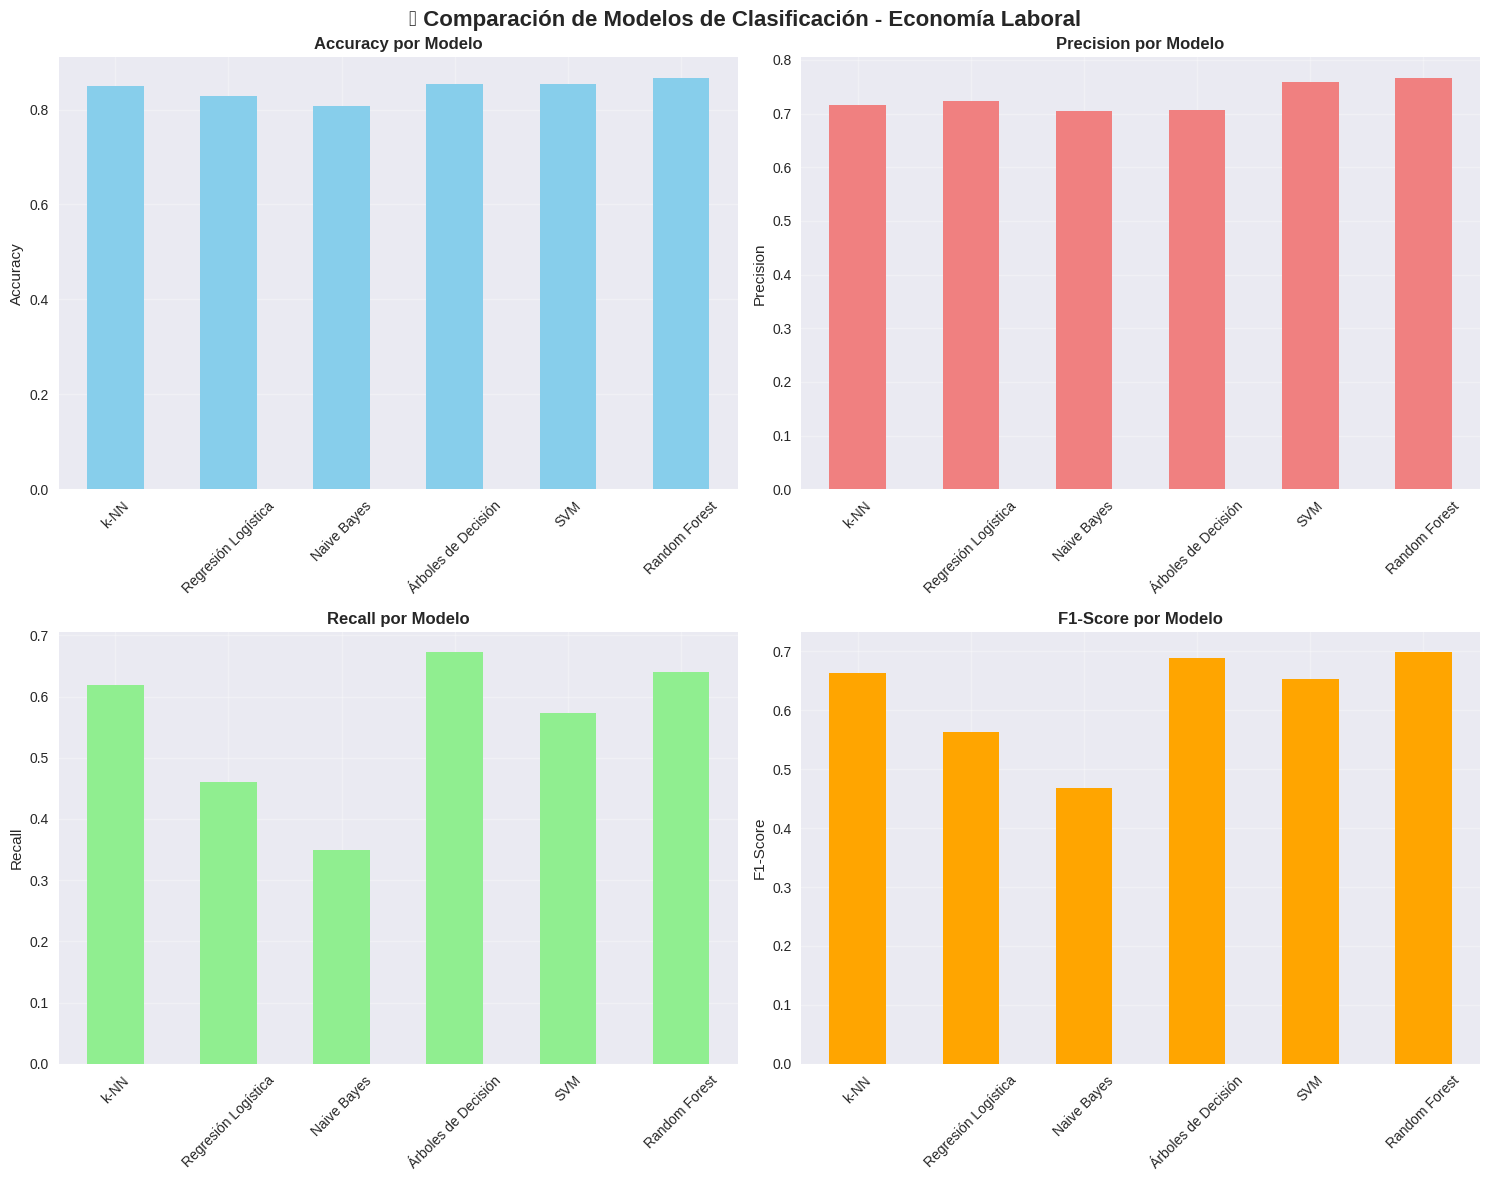

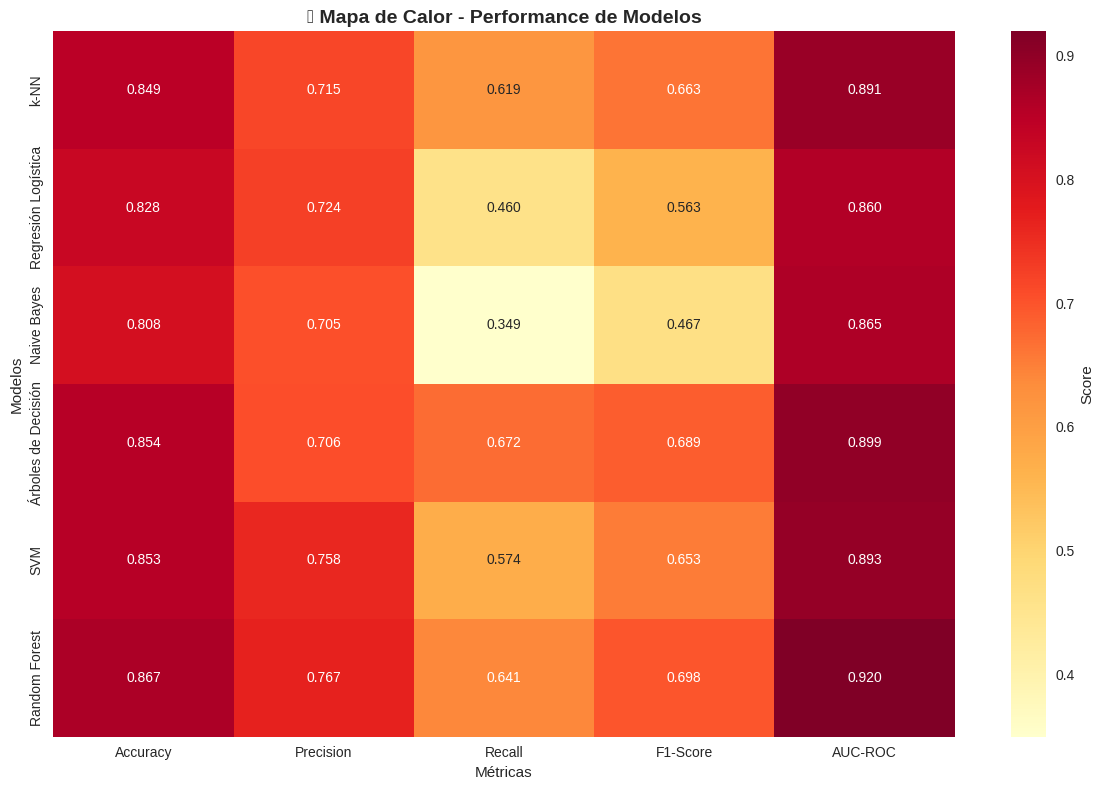

In [ ]:
print("\n" + "="*50)
print("📊 COMPARACIÓN VISUAL DE RESULTADOS")
print("="*50)

# Crear DataFrame de resultados
metrics_df = pd.DataFrame({
    name: {
        'Accuracy': results['accuracy'],
        'Precision': results['precision'],
        'Recall': results['recall'],
        'F1-Score': results['f1'],
        'AUC-ROC': results['auc'] if results['auc'] else 0
    }
    for name, results in test_results.items()
}).T

print("📊 Tabla de Métricas:")
print(metrics_df.round(4))

# Visualización 1: Gráfico de barras de métricas
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🎯 Comparación de Modelos de Clasificación - Economía Laboral', fontsize=16, fontweight='bold')

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx//2, idx%2]
    metrics_df[metric].plot(kind='bar', ax=ax, color=colors[idx])
    ax.set_title(f'{metric} por Modelo', fontweight='bold')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualización 2: Heatmap de métricas
plt.figure(figsize=(12, 8))
sns.heatmap(metrics_df, annot=True, cmap='YlOrRd', fmt='.3f', cbar_kws={'label': 'Score'})
plt.title('🔥 Mapa de Calor - Performance de Modelos', fontsize=14, fontweight='bold')
plt.xlabel('Métricas')
plt.ylabel('Modelos')
plt.tight_layout()
plt.show()

## 🔍 ¿Qué Buscar en las Visualizaciones?

**En el gráfico de barras:**
- **Consistencia:** ¿Algún modelo es bueno en todas las métricas?
- **Especialización:** ¿Algún modelo es mejor que todos en una métrica específica?
- **Baseline comparison:** ¿Todos superan el 76% de accuracy naive?

**En el heatmap:**
- **Patrones de color:** Filas más "rojas" = mejores modelos
- **Trade-offs:** Celdas rojas vs amarillas en misma fila
- **Clustering:** Modelos con perfiles similares

**Red flags a detectar:**
- Accuracy alta pero F1 bajo (problema de desbalance)
- Precision muy alta pero recall muy bajo (modelo muy conservador)
- Variabilidad extrema entre métricas (modelo inconsistente)

## 📊 Curvas ROC: Capacidad de Discriminación

**¿Qué son las curvas ROC?**

ROC (Receiver Operating Characteristic) muestra el trade-off entre:
- **TPR (True Positive Rate):** Recall = TP/(TP+FN)
- **FPR (False Positive Rate):** FP/(FP+TN)

**¿Por qué son importantes?**
1. **Independientes del threshold:** Muestran performance en todos los puntos de corte
2. **Comparación visual:** Fácil ver qué modelo discrimina mejor
3. **AUC como resumen:** Área bajo curva = probabilidad de ranking correcto

**¿Qué esperamos?**
- **Línea diagonal:** Random classifier (AUC = 0.5)
- **Esquina superior izquierda:** Classifier perfecto (AUC = 1.0)
- **Curvas "abultadas":** Mejores modelos más alejados de diagonal

**Interpretación económica:**
AUC = Probabilidad de que una persona con ingresos >\$50K tenga score más alto que una persona con ingresos ≤\$50K


📊 CURVAS ROC


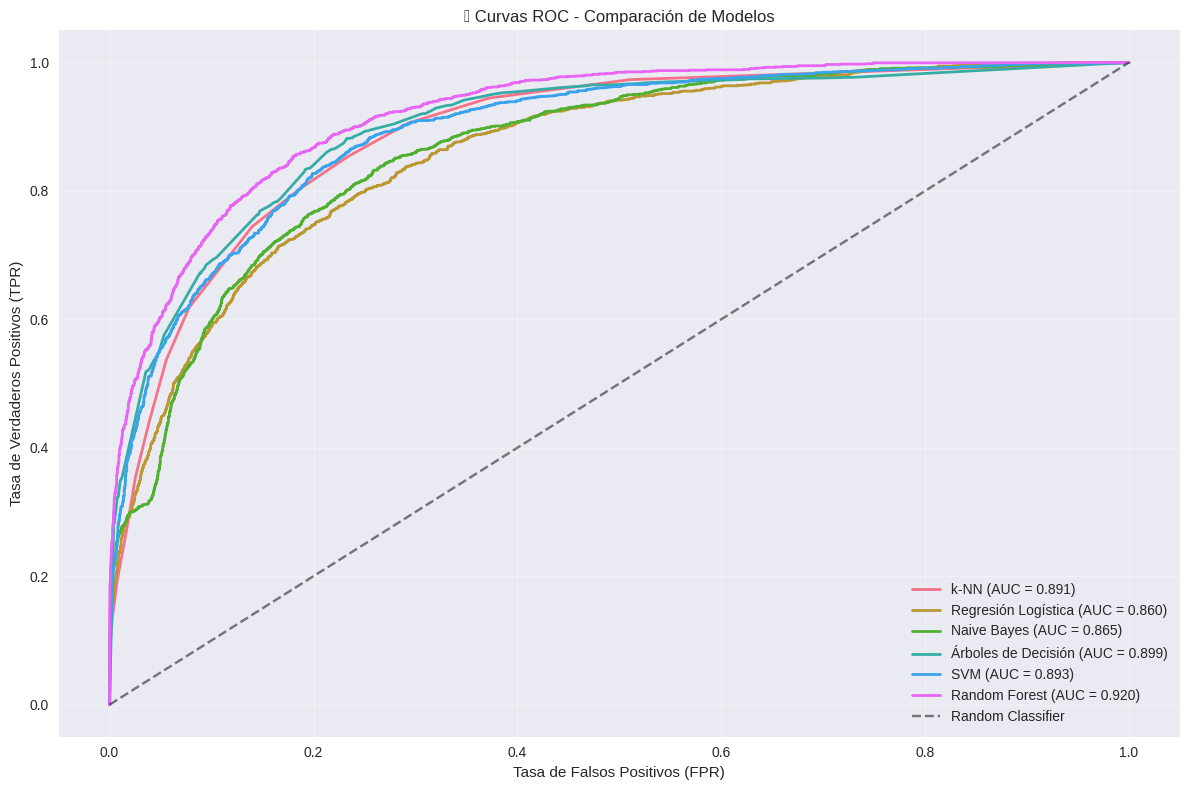

In [ ]:
print("\n" + "="*50)
print("📊 CURVAS ROC")
print("="*50)

plt.figure(figsize=(12, 8))

for name, results in test_results.items():
    if results['y_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, results['y_proba'])
        plt.plot(fpr, tpr, label=f"{name} (AUC = {results['auc']:.3f})", linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', alpha=0.5)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('📈 Curvas ROC - Comparación de Modelos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 🎯 Interpretación de las Curvas ROC

**¿Cómo leer estas curvas?**

- **Curva más cerca de esquina superior izquierda:** Mejor discriminación
- **AUC > 0.8:** Excelente discriminación
- **AUC 0.7-0.8:** Buena discriminación  
- **AUC < 0.7:** Discriminación modesta

**En contexto económico:**
Un AUC de 0.85 significa que si tomamos aleatoriamente una persona que gana >$50K y otra que gana ≤$50K, en 85% de los casos nuestro modelo asignará score más alto a la primera.

**¿Por qué algunos modelos no aparecen?**
Modelos que no generan probabilidades (como algunos SVM sin probability=True) no pueden generar curvas ROC.

## 📊 Matrices de Confusión: Desglosando los Errores

**¿Qué nos muestran las matrices de confusión?**

Cada matriz muestra los 4 tipos de predicciones:
- **True Negatives (TN):** Correctamente predicho ≤\$50K
- **False Positives (FP):** Incorrectamente predicho >\$50K  
- **False Negatives (FN):** Incorrectamente predicho ≤\$50K
- **True Positives (TP):** Correctamente predicho >\$50K

**¿Por qué importan los tipos de error?**

En economía laboral, diferentes errores tienen diferentes costos:
  - **FP (Falso Positivo):** Predecir >\\$50K cuando es ≤\\$50K
  - Implicación: Sobrestimar poder adquisitivo, marketing ineficiente
  - **FN (Falso Negativo):** Predecir ≤\\$50K cuando es >\\$50K  
  - Implicación: Subestimar segmento alto valor, oportunidades perdidas

**¿Qué buscar?**
- **Diagonal fuerte:** Muchos aciertos (TN + TP)
- **Balance de errores:** ¿Los errores están balanceados o sesgados?
- **Patrón por modelo:** ¿Algunos modelos son sistemáticamente conservadores/agresivos?


📊 MATRICES DE CONFUSIÓN


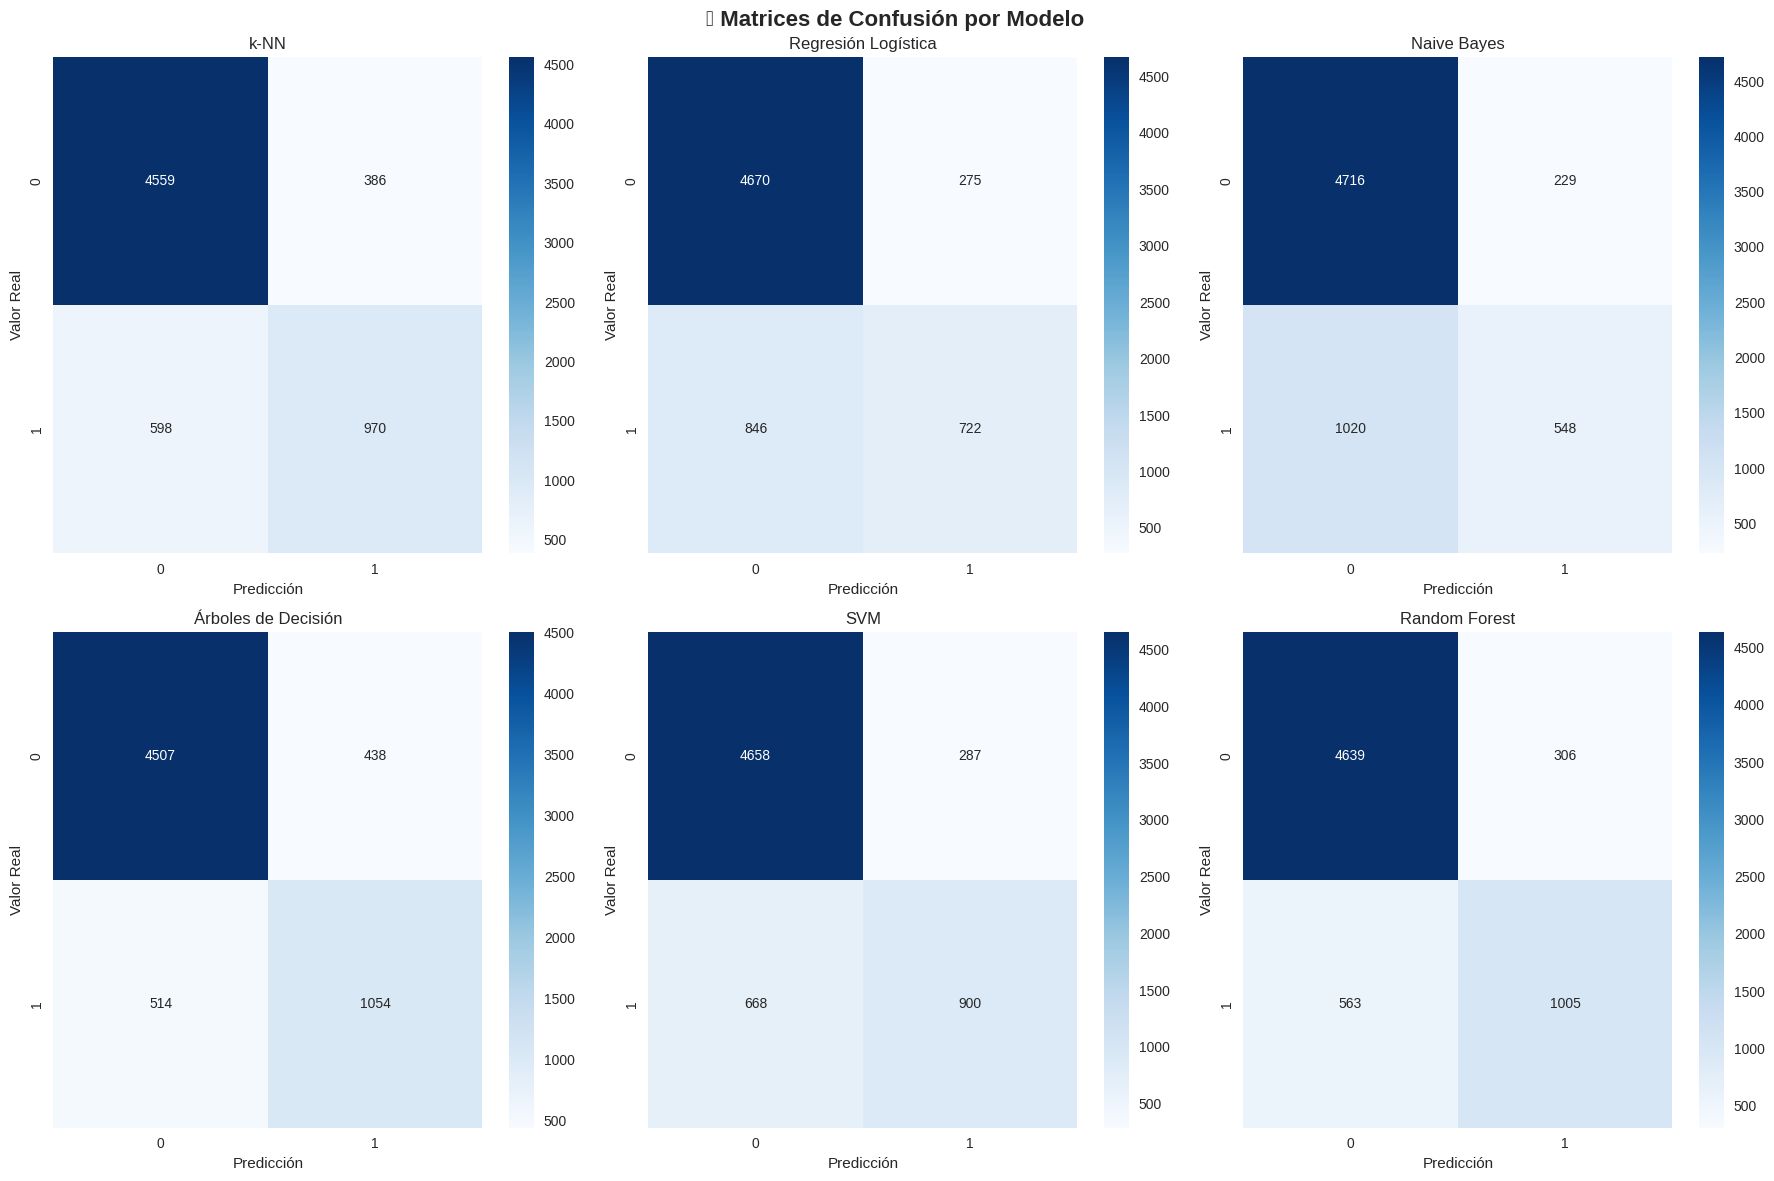

In [ ]:
print("\n" + "="*50)
print("📊 MATRICES DE CONFUSIÓN")
print("="*50)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🎯 Matrices de Confusión por Modelo', fontsize=16, fontweight='bold')

for idx, (name, results) in enumerate(test_results.items()):
    ax = axes[idx//3, idx%3]
    cm = confusion_matrix(y_test, results['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{name}')
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Valor Real')

plt.tight_layout()
plt.show()

## 🧠 Interpretación Económica de las Matrices

**Patrones a identificar:**

1. **Modelos conservadores:** Muchos FN, pocos FP
   - Predicen ≤$50K frecuentemente, pierden casos de ingresos altos
   - Útiles cuando el costo de FP es alto

2. **Modelos agresivos:** Muchos FP, pocos FN  
   - Predicen >$50K frecuentemente, incluyen casos de ingresos bajos
   - Útiles cuando el costo de FN es alto

3. **Modelos balanceados:** FP ≈ FN
   - No sesgo sistemático hacia conservadurismo/agresividad

## 📊 Feature Importance: ¿Qué Variables Importan?

**¿Por qué analizar importancia de características?**

1. **Insight económico:** ¿Qué determina realmente los ingresos laborales?
2. **Validación teórica:** ¿Los resultados coinciden con teoría económica?
3. **Simplificación de modelos:** ¿Podemos usar menos variables?
4. **Policy implications:** ¿En qué variables enfocar políticas públicas?

**Métodos de importancia:**

- **Random Forest/Árboles:** Basado en reducción de impureza (Gini/Entropy)
- **Regresión Logística:** Magnitud de coeficientes (con interpretación de odds ratios)

**¿Qué esperamos encontrar?**

Basado en teoría económica, esperamos que las variables más importantes sean:
1. **Education/education_num:** Capital humano
2. **Age:** Experiencia laboral
3. **Hours_per_week:** Intensidad laboral
4. **Occupation:** Tipo de trabajo
5. **Marital_status:** Economía del hogar

**¿Qué nos sorprendería?**
- Si variables demográficas (race, sex) fueran muy importantes (problemas de discriminación)
- Si capital_gain/loss dominaran (indicaría que riqueza > trabajo)


In [ ]:
print("\n" + "="*50)
print("🔍 ANÁLISIS DE IMPORTANCIA DE VARIABLES")
print("="*50)

# Nombres de las características en el orden correcto
feature_names = categorical_features + numerical_features
print(f"📊 Variables analizadas: {len(feature_names)}")
print(f"📋 Lista: {feature_names}")

# Diccionario para almacenar importancias
feature_importance_results = {}


🔍 ANÁLISIS DE IMPORTANCIA DE VARIABLES
📊 Variables analizadas: 13
📋 Lista: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


## 🌲 Random Forest: Importancia por Reducción de Impureza

**¿Cómo funciona?**
Random Forest calcula importancia basada en cuánto cada variable reduce la impureza (Gini)
cuando se usa para hacer splits en los árboles del ensemble.

**Interpretación:**
- **Valores más altos:** Variables que mejor separan las clases
- **Suma a 1.0:** Importancias normalizadas
- **Robust:** Promediado sobre muchos árboles reduce variabilidad


📊 IMPORTANCIA DE VARIABLES - RANDOM FOREST
           Feature  Importance
10    capital_gain      0.1734
4     relationship      0.1716
9    education_num      0.1338
8              age      0.1249
2   marital_status      0.0977
12  hours_per_week      0.0752
3       occupation      0.0606
11    capital_loss      0.0462
1        education      0.0413
0        workclass      0.0326
6              sex      0.0172
7   native_country      0.0146
5             race      0.0109


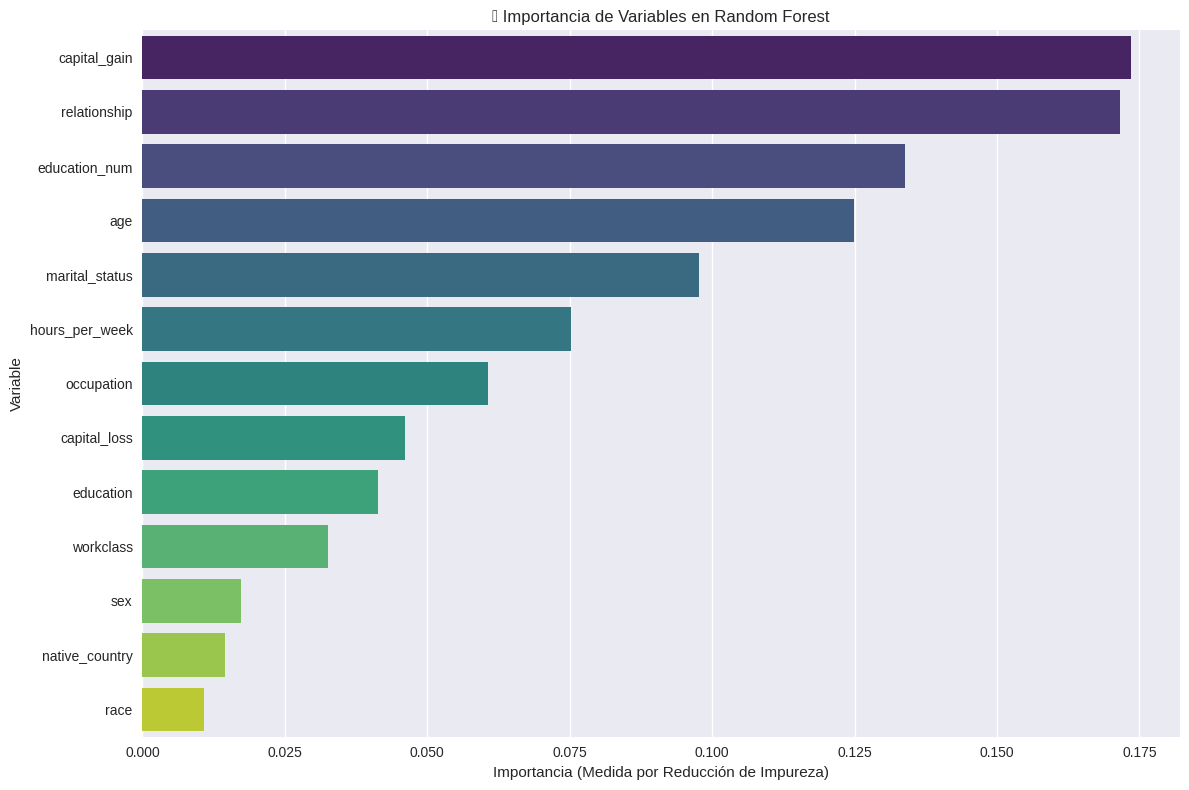

In [ ]:
# Obtener el modelo Random Forest entrenado
rf_model = test_results['Random Forest']['model']

# Obtener la importancia de las características
importances = rf_model.feature_importances_

# Crear un DataFrame para visualizar la importancia con los nombres de las variables
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Ordenar por importancia descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\n" + "="*50)
print("📊 IMPORTANCIA DE VARIABLES - RANDOM FOREST")
print("="*50)
print(feature_importance_df.round(4))

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('📈 Importancia de Variables en Random Forest')
plt.xlabel('Importancia (Medida por Reducción de Impureza)')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

Hacemos lo mismo con la regresión logística. Para el resto de los modelos (excepto árboles que es muy parecido a Random Forest) no hay forma obvia de ver importancia de las variables.

- k-NN: Se basa en la distancia a los vecinos. La "importancia" de una variable dependería de cómo afecta la distancia en el espacio de características, lo cual no se resume en un único valor por variable.

- Naive Bayes: Se basa en probabilidades condicionales. No hay una medida única de "importancia" global para cada variable.

- SVM: Con kernels no lineales (como RBF), la importancia de las variables es difícil de determinar directamente. Con un kernel lineal, los coeficientes podrían dar una idea (similar a Regresión Logística), pero no es tan común interpretarlo como "importancia de variable" en el mismo sentido.

In [ ]:
# Get the trained Logistic Regression model
logreg_model = test_results['Regresión Logística']['model']

# Get the coefficients
coefficients = logreg_model.coef_[0]

# Create a DataFrame to visualize the importance with feature names
logreg_feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients) # Calculate Odds Ratios
})

# Sort by absolute coefficient value (or Odds Ratio deviation from 1)
logreg_feature_importance_df = logreg_feature_importance_df.sort_values(
    by='Odds Ratio', ascending=False, key=lambda x: np.abs(x - 1)
)

print("\n" + "="*50)
print("📊 IMPORTANCIA DE VARIABLES - REGRESIÓN LOGÍSTICA (Odds Ratios)")
print("="*50)
print(logreg_feature_importance_df.round(4))

# Visualizar la importancia de las características (Odds Ratios)
plt.figure(figsize=(12, 8))
sns.barplot(x='Odds Ratio', y='Feature', data=logreg_feature_importance_df, palette='viridis')
plt.title('📈 Odds Ratio de Variables en Regresión Logística')
plt.xlabel('Odds Ratio (Odds de >$50K vs <=$50K)')
plt.ylabel('Variable')
plt.xscale('log') # Use log scale for better visualization of wide range
plt.axvline(1, color='red', linestyle='--', label='Odds Ratio = 1 (No effect)') # Add a line at 1
plt.legend()
plt.tight_layout()
plt.show()

## 🧠 Interpretación Económica de Feature Importance

**¿Cómo interpretar los coeficientes de Regresión Logística?**

- **Coeficiente positivo:** Aumenta la probabilidad de ingresos >\$50K
- **Coeficiente negativo:** Disminuye la probabilidad de ingresos >\$50K  
- **Odds Ratio > 1:** Factor multiplicativo en las odds de ingresos altos
- **Odds Ratio < 1:** Factor divisivo en las odds de ingresos altos

**Ejemplo de interpretación:**
Si 'education_num' tiene coeficiente 0.3 (odds ratio = 1.35):
- Cada año adicional de educación multiplica las odds de ganar >\$50K por 1.35
- Es un retorno del 35% en odds por año de educación

**¿Coinciden con teoría económica?**
- **Capital humano:** education, age deberían ser importantes y positivos
- **Discriminación:** sex, race con coeficientes significativos serían preocupantes
- **Economía del hogar:** marital_status podría mostrar especialización laboral

**Diferencias Random Forest vs Regresión Logística:**
- RF captura interacciones no-lineales
- Regresión Logística asume efectos lineales
- Si difieren mucho, sugiere relaciones complejas

## 🎯 Síntesis: De Números a Decisiones

**¿Cómo pasar de métricas a recomendaciones?**

1. **Contexto del problema:** ¿Para qué se usará el modelo?
2. **Costo relativo de errores:** ¿FP vs FN, cuál es más costoso?
3. **Interpretabilidad vs Performance:** ¿Necesitamos entender las decisiones?
4. **Recursos computacionales:** ¿Rapidez vs precisión?
5. **Mantenimiento:** ¿Qué tan fácil es reentrenar/actualizar?

**Framework de decisión:**

- **Investigación académica:** Interpretabilidad + performance balanceado
- **Policy making:** Máxima interpretabilidad (incluso sacrificando performance)
- **Aplicaciones comerciales:** Máximo performance (si interpretabilidad no es crítica)
- **Sistemas en tiempo real:** Velocidad + performance razonable

**¿Qué hemos aprendido metodológicamente?**
- Grid Search funciona para optimización sistemática
- Test set revela el performance "real"
- Diferentes algoritmos sobresalen en diferentes aspectos
- Feature importance revela insights económicos

## 💾 Documentando Resultados para Reproducibilidad

**¿Por qué exportar resultados?**

1. **Reproducibilidad:** Otros pueden verificar nuestros hallazgos
2. **Comunicación:** Tablas limpias para reportes/papers
3. **Decisiones futuras:** Base para comparaciones posteriores
4. **Auditoría:** Rastreo completo del proceso de modelado

**¿Qué incluimos en el export?**

- **Performance metrics:** Todas las métricas calculadas
- **Hyperparameters:** Configuraciones óptimas encontradas
- **CV scores:** Performance en validación cruzada
- **Ranking:** Ordenamiento por diferentes criterios

Esto permite a otros:
- Replicar nuestros resultados
- Usar nuestros mejores hiperparámetros como punto de partida
- Comparar con sus propios resultados
- Entender nuestro proceso de selección de modelos

In [ ]:
# Exportar resultados
print("\n" + "="*50)
print("💾 DOCUMENTANDO Y EXPORTANDO RESULTADOS")
print("="*50)

# Recopilar resultados de evaluación en test
test_metrics_summary = {name: {
    'Accuracy': res['accuracy'],
    'Precision': res['precision'],
    'Recall': res['recall'],
    'F1-Score': res['f1'],
    'AUC-ROC': res['auc'] if res['auc'] is not None else 'N/A' # Handle models without probability
} for name, res in test_results.items()}

# Recopilar mejores hiperparámetros y CV scores
# Need to get the 'model_results' dictionary which holds the best_params and cv_score
# from the previous GridSearchCV steps, not the test_results.
hyperparams_cv_summary = {}
for name, model_info in model_results.items(): # Using the corrected model_results dictionary
    hyperparams_cv_summary[name] = {
        'Best Hyperparameters': str(model_info.get('best_params', 'N/A')), # Convert dict to string
        'Best CV Score (F1)': model_info.get('cv_score', 'N/A')
    }

# Combinar ambos diccionarios en uno para crear un DataFrame
combined_results = {}
for name in test_metrics_summary.keys():
    combined_results[name] = {**test_metrics_summary[name], **hyperparams_cv_summary.get(name, {})}


results_df = pd.DataFrame.from_dict(combined_results, orient='index')

print("\n📊 Resumen Completo de Resultados:")
display(results_df.round(4))

# Exportar a CSV
csv_filename = "clasification_models_results.csv"
results_df.to_csv(csv_filename)

print(f"\n✅ Resultados exportados exitosamente a '{csv_filename}'")

## 🎯 Ejercicio Práctico: Predicción de Incumplimiento en Clientes de Tarjeta de Crédito

**Dataset**: Default of Credit Card Clients (disponible en UCI Machine Learning Repository o Kaggle)

**Objetivo**: Aplicar y comparar algoritmos de clasificación supervisada para predecir si un cliente de tarjeta de crédito en Taiwán incumplirá (default) su pago el próximo mes.

**Contexto Económico/Financiero**: El incumplimiento de pagos es un problema crítico para las instituciones financieras. Predecir qué clientes tienen mayor riesgo permite implementar estrategias de mitigación, como ajustar límites de crédito, ofrecer asesoramiento o aplicar diferentes políticas de cobro. Este ejercicio nos permitirá ver qué factores (edad, educación, historial de pago, etc.) son los más predictivos del riesgo de crédito.

**Tarea**:

1. Carga y Exploración de Datos: Cargar el dataset, entender su estructura, identificar variables clave y verificar la presencia de valores faltantes o atípicos.

2. Preprocesamiento: Preparar los datos para los modelos de clasificación. Esto podría incluir:
- Manejo de valores categóricos (si los hay y son relevantes).
- Escalamiento de variables numéricas.
- División en conjuntos de entrenamiento y prueba (Train/Test split).
3. Modelado: Entrenar y ajustar al menos 3-4 algoritmos de clasificación supervisada en el conjunto de entrenamiento. Considera algoritmos como:
- Regresión Logística
- Árboles de Decisión
- Random Forest
- SVM (si el tiempo de cómputo lo permite)
4. Evaluación: Evaluar el rendimiento de los modelos en el conjunto de prueba utilizando métricas relevantes para problemas de clasificación desbalanceada (ya que el número de defaults suele ser menor que el de no-defaults), como:
- Accuracy (como métrica general)
- Precision,
- Recall,
- F1-Score (cruciales por el desbalance)
- AUC-ROC
5. Análisis de Importancia de Variables: Si el modelo lo permite (ej. modelos basados en árboles o modelos lineales), identifica qué variables son las más importantes para predecir el incumplimiento. Interpreta estos hallazgos en el contexto económico/financiero.
6. Conclusiones: Compara el rendimiento de los modelos, discute las variables más importantes y sugiere implicaciones prácticas para una institución financiera.

**Variables Clave Sugeridas para el Análisis**:

1. Target Variable: default.payment.next.month (0 = no incumplimiento, 1 = incumplimiento)
2. Variables Predictoras (Considerar:
- LIMIT_BAL: Monto de crédito otorgado.
- SEX: Género.
- EDUCATION: Nivel educativo.
- MARRIAGE: Estado civil.
- AGE: Edad.
- PAY_0 a PAY_6: Historial de pagos en los últimos 6 meses (indicadores de retraso).
- BILL_AMT1 a BILL_AMT6: Monto del resumen de cuenta en los últimos 6 meses.
- PAY_AMT1 a PAY_AMT6: Monto del pago anterior en los últimos 6 meses.

Este ejercicio te permitirá aplicar nuevamente todo el pipeline de machine learning en un contexto de negocio diferente pero con variables que tienen claras interpretaciones económicas.